In [1]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
data = load_iris()

In [3]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
Y = pd.DataFrame(data['target'], columns= ['Target'])

In [6]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
Y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [8]:
data = pd.concat([X, Y], axis=1)

In [9]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
data['Target'].isnull().sum()

0

In [11]:
X.shape

(150, 4)

In [12]:
Y.shape

(150, 1)

In [13]:
data.shape

(150, 5)

In [14]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
scaler = MinMaxScaler().fit(X)

In [16]:
X_scal = scaler.transform(X)

In [17]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
X_scal

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [19]:
X_scal = pd.DataFrame(X_scal, columns=X.columns)

In [20]:
X_scal

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [21]:
pca = PCA(n_components=2).fit(X)

In [22]:
X_PCA = pca.fit_transform(X)

In [23]:
X_EMM = pd.DataFrame(X_PCA, columns=['Axis1', 'Axis2'])

In [24]:
print(f"PCA Variance: {pca.explained_variance_ratio_}")

PCA Variance: [0.92461872 0.05306648]


In [25]:
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

0.977685206318795

In [26]:
list(range(2, 6))

[2, 3, 4, 5]

In [27]:
for cluster in list(range(2, 6)):
    Cluster = KMeans(n_clusters=cluster).fit(X_scal)
    labels = Cluster.predict(X_scal)
    
    data[f'{cluster} label'] = labels
    labels = pd.DataFrame(labels, columns=['labels'])
    
    plot_data = pd.concat([X_EMM, labels], axis=1)
    groups = plot_data.groupby('labels')

In [28]:
labels.shape

(150, 1)

In [29]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,2 label,3 label,4 label,5 label
145,6.7,3.0,5.2,2.3,2,0,0,3,2
146,6.3,2.5,5.0,1.9,2,0,2,0,4
147,6.5,3.0,5.2,2.0,2,0,0,0,2
148,6.2,3.4,5.4,2.3,2,0,0,3,2
149,5.9,3.0,5.1,1.8,2,0,2,0,4


In [30]:
groups

In [31]:
mark = ['o', '*', 'D', "x", "v"]
color = ['red', 'orange', 'green', 'blue', 'black']

c:\Users\Jarvis\anaconda3\envs\machine_learning\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\Jarvis\anaconda3\envs\machine_learning\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


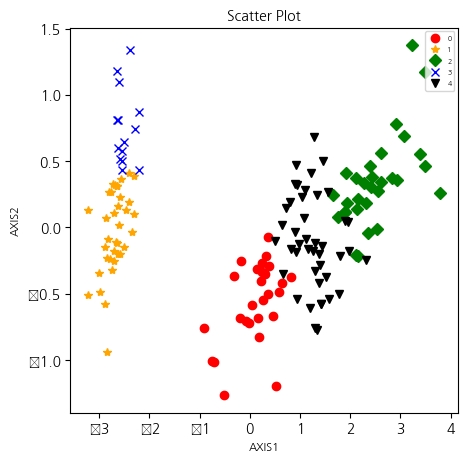

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))
for i, (name, group) in enumerate(groups):
    ax.plot(group['Axis1'], group['Axis2'], marker = mark[i],
            linestyle = '', label=name, c = color[i], ms=6)
    ax.legend(fontsize=5, loc = 'upper right')
    plt.title('Scatter Plot', fontsize=10)
    plt.xlabel('AXIS1', fontsize=8)
    plt.ylabel('AXIS2', fontsize=8)
    
    gc.collect()

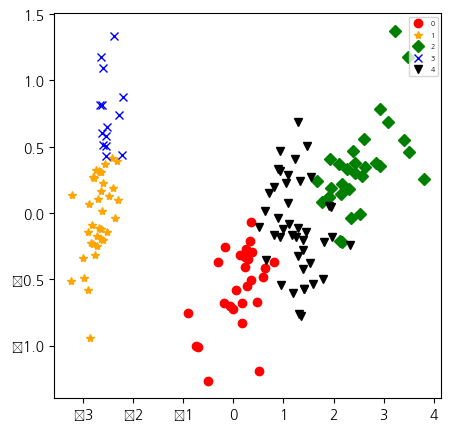

In [33]:
fig

In [34]:
ax

<AxesSubplot:>

c:\Users\Jarvis\anaconda3\envs\machine_learning\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\Jarvis\anaconda3\envs\machine_learning\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


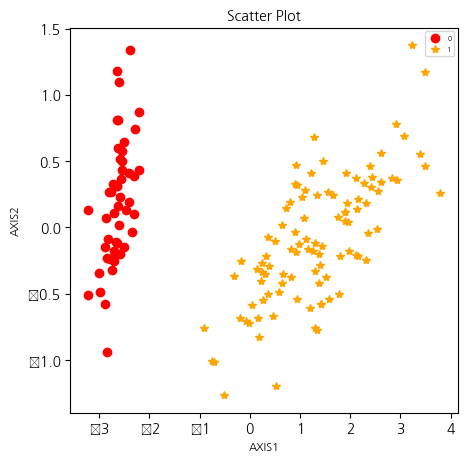

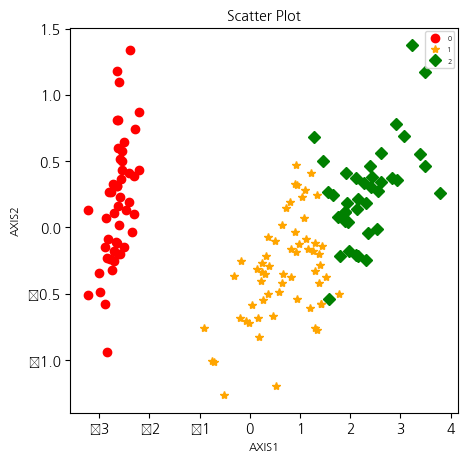

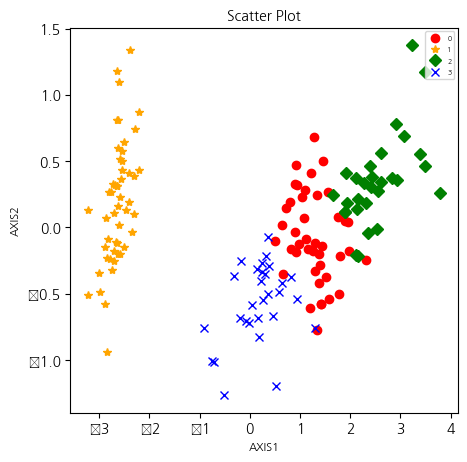

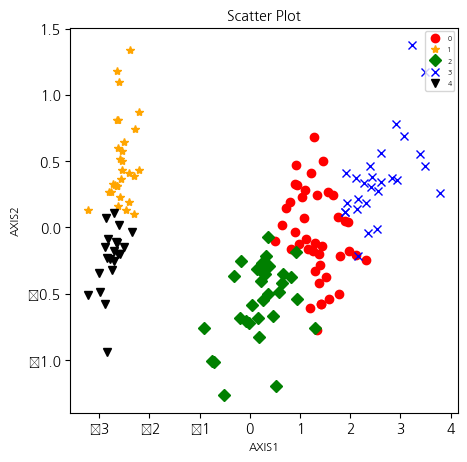

In [41]:
for cluster in list(range(2, 6)):
    Cluster = KMeans(n_clusters=cluster).fit(X_scal)
    labels = Cluster.predict(X_scal)
    
    data[f'{cluster} label'] = labels
    labels = pd.DataFrame(labels, columns=['labels'])
    
    plot_data = pd.concat([X_EMM, labels], axis=1)
    groups = plot_data.groupby('labels')
    
    mark = ['o', '*', 'D', "x", "v"]
    color = ['red', 'orange', 'green', 'blue', 'black'] 
    
    fig, ax = plt.subplots(figsize=(5, 5))
    
    for i, (name, group) in enumerate(groups):
        ax.plot(group['Axis1'], group['Axis2'], marker = mark[i],
                linestyle = '', label=name, c = color[i], ms=6)
        ax.legend(fontsize=5, loc = 'upper right')
        plt.title('Scatter Plot', fontsize=10)
        plt.xlabel('AXIS1', fontsize=8)
        plt.ylabel('AXIS2', fontsize=8)
        
        gc.collect()
    